In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as mlt
import numpy as np

df=pd.read_csv("C:/Users/arshad/Documents/projects/student.csv")
print(df.head())

df.describe()

df.info()

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [4]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [5]:
#drop unnamed column

df=df.drop("Unnamed: 0",axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


In [38]:
# Check for unique values in categorical columns
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}")

Gender: ['female' 'male']
EthnicGroup: [nan 'group C' 'group B' 'group A' 'group D' 'group E']
ParentEduc: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]
LunchType: ['standard' 'free/reduced']
TestPrep: ['none' nan 'completed']
ParentMaritalStatus: ['married' 'single' 'widowed' nan 'divorced']
PracticeSport: ['regularly' 'sometimes' 'never' nan]
IsFirstChild: ['yes' 'no' nan]
TransportMeans: ['school_bus' nan 'private']
WklyStudyHours: ['< 5' '5 - 10' '> 10' nan]


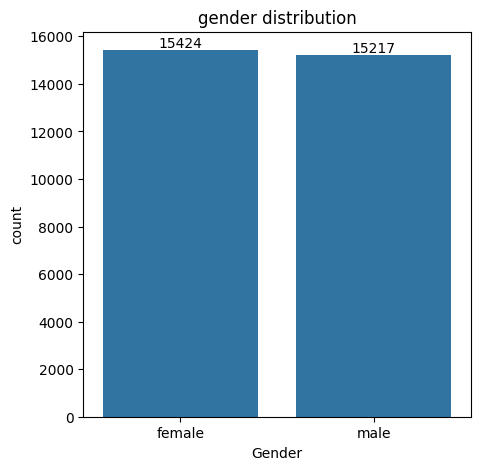

In [39]:
#gender distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
a=sns.countplot(data=df,x="Gender")
a.bar_label(a.containers[0])
plt.title("gender distribution")
plt.show()

In [ ]:
#from above chart we found that females are higher in numbers than male

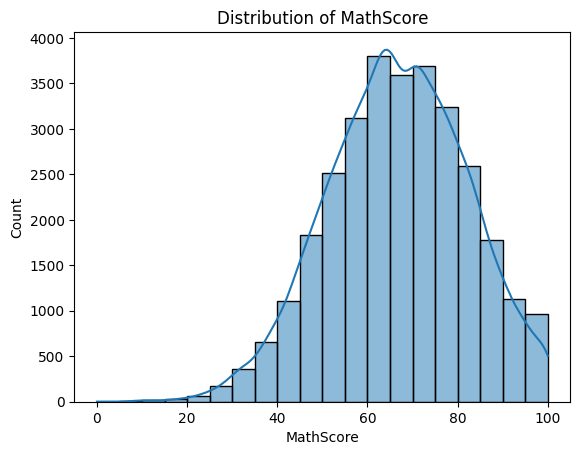

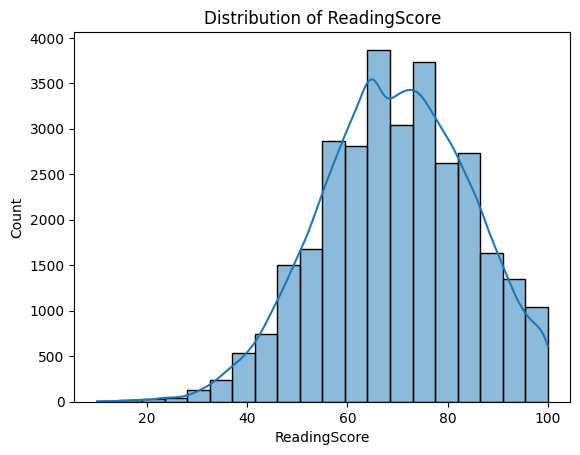

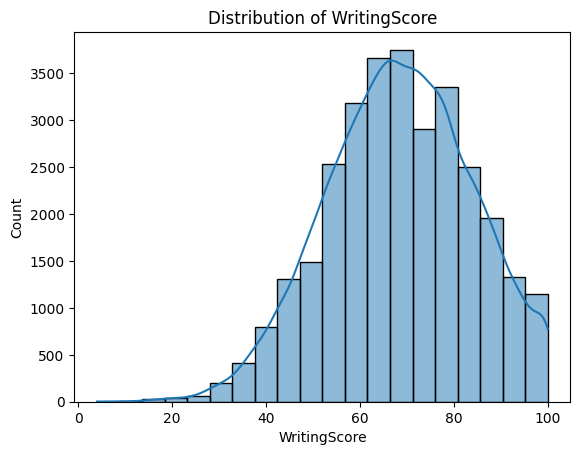

In [43]:
# Plot distributions
for col in ['MathScore', 'ReadingScore', 'WritingScore']:
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()


In [10]:
y=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(y)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


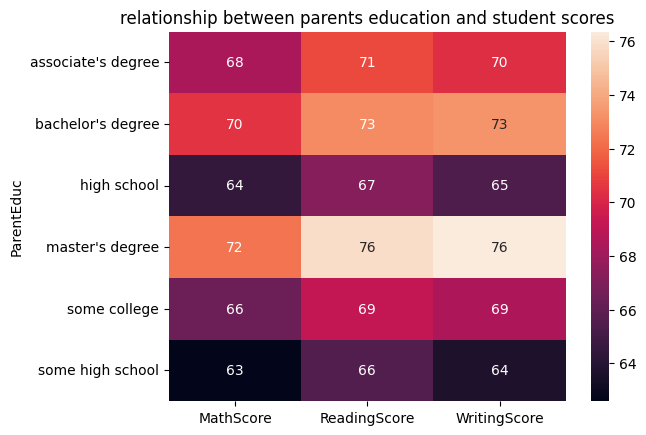

In [16]:
sns.heatmap(y,annot=True)
plt.title("relationship between parents education and student scores")
plt.show()

In [ ]:
#from above chart we can conclude that parents education have good impact in student scores.
#student of parents with masters degree hold high scores

In [13]:
y1=df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(y1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


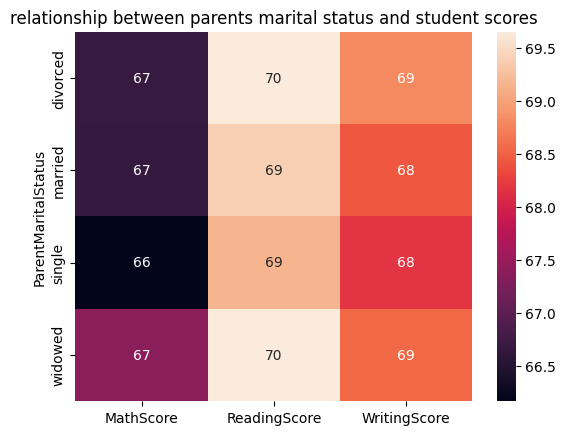

In [17]:
sns.heatmap(y1,annot=True)
plt.title("relationship between parents marital status and student scores")
plt.show()

In [ ]:
#from above chart we can conclude that parents marital status have negligible impact in student scores.

In [19]:
y2=df.groupby("NrSiblings").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(y2)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.0         66.819449     69.547812     68.746515
1.0         66.473896     69.259097     68.245345
2.0         66.554934     69.472018     68.522533
3.0         66.719092     69.488159     68.650498
4.0         66.245495     69.144169     68.073444
5.0         66.630303     69.453788     68.282576
6.0         65.917219     68.801325     67.860927
7.0         67.615120     69.828179     68.986254


In [20]:
y3=df.groupby("WklyStudyHours").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(y3)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


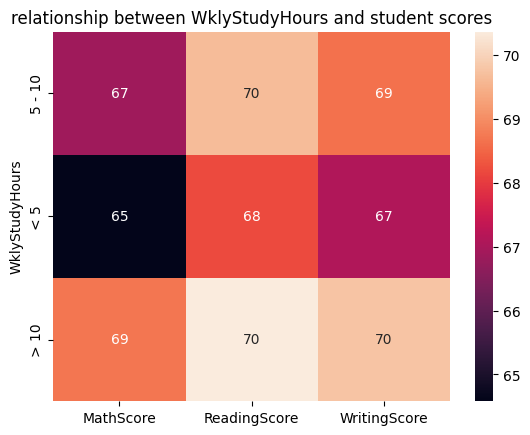

In [21]:
sns.heatmap(y3,annot=True)
plt.title("relationship between WklyStudyHours and student scores")
plt.show()

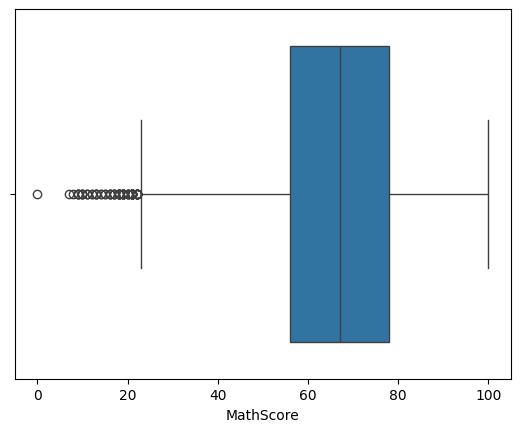

In [22]:
sns.boxplot(data=df,x="MathScore")
plt.show()

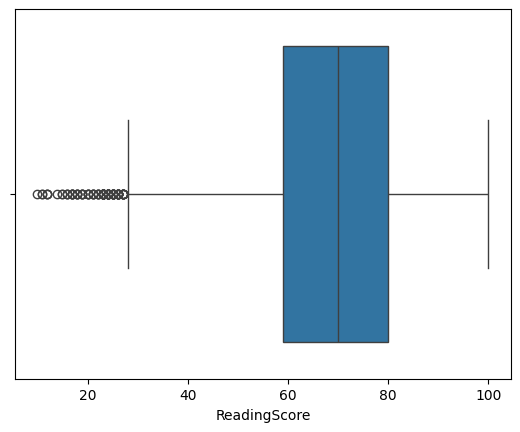

In [23]:
sns.boxplot(data=df,x="ReadingScore")
plt.show()

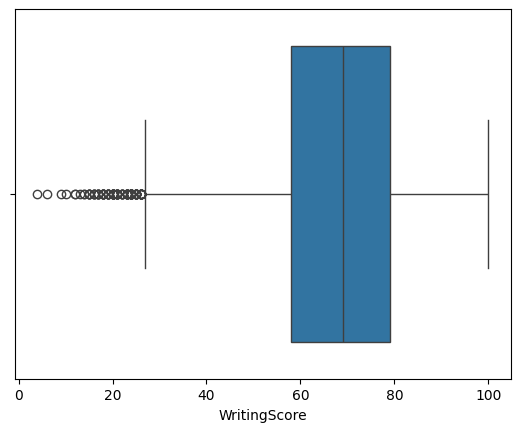

In [24]:
sns.boxplot(data=df,x="WritingScore")
plt.show()

In [25]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [27]:
#distribution of ethnic groups

g1=df.loc[(df['EthnicGroup']=="group A")].count()
print(g1)

g2=df.loc[(df['EthnicGroup']=="group B")].count()
print(g2)

g3=df.loc[(df['EthnicGroup']=="group C")].count()
print(g3)

g4=df.loc[(df['EthnicGroup']=="group D")].count()
print(g4)

g5=df.loc[(df['EthnicGroup']=="group E")].count()
print(g5)

Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64
Gender                 5826
EthnicGroup            5826
ParentEduc             5470
LunchType              5826
TestPrep               5488
ParentMaritalStatus    5605
PracticeSport          5704
IsFirstChild           5649
NrSiblings             5546
TransportMeans         5238
WklyStudyHours         5642
MathScore              5826
ReadingScore           5826
WritingScore           5826
dtype: int64
Gender                 9212
EthnicGroup            9212
ParentEduc             8652
LunchType              9212
TestPrep               8652
ParentMaritalStatus    8858
PracticeSport         

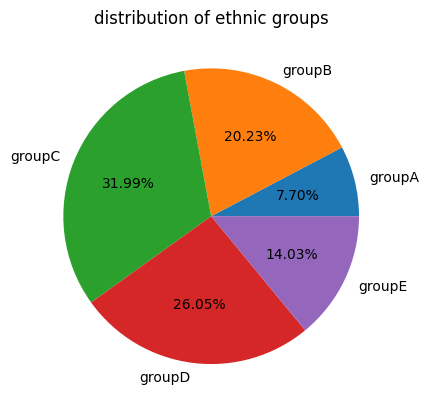

In [33]:
label=["groupA","groupB","groupC","groupD","groupE"]
ls=[g1['EthnicGroup'],g2['EthnicGroup'],g3['EthnicGroup'],g4['EthnicGroup'],g5['EthnicGroup']]
plt.pie(ls,labels=label,autopct="%1.2f%%")
plt.title("distribution of ethnic groups")
plt.show()

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed   69.54666     73.732998     74.703265
none        64.94877     67.051071     65.092756


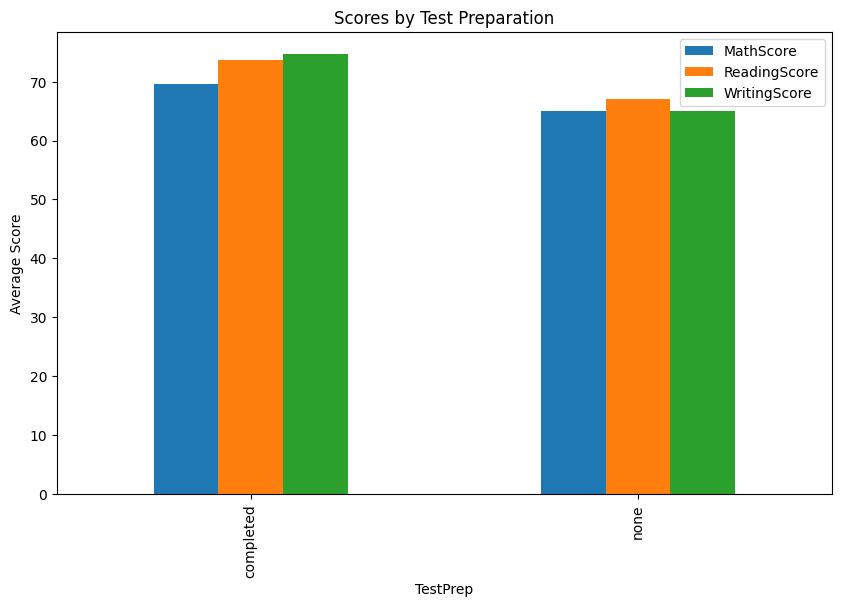

In [45]:
# Compare scores with/without TestPrep
test_prep_scores = df.groupby('TestPrep')[['MathScore', 'ReadingScore', 'WritingScore']].mean()
print(test_prep_scores)

# Plot results
test_prep_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Scores by Test Preparation')
plt.ylabel('Average Score')
plt.show()


               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


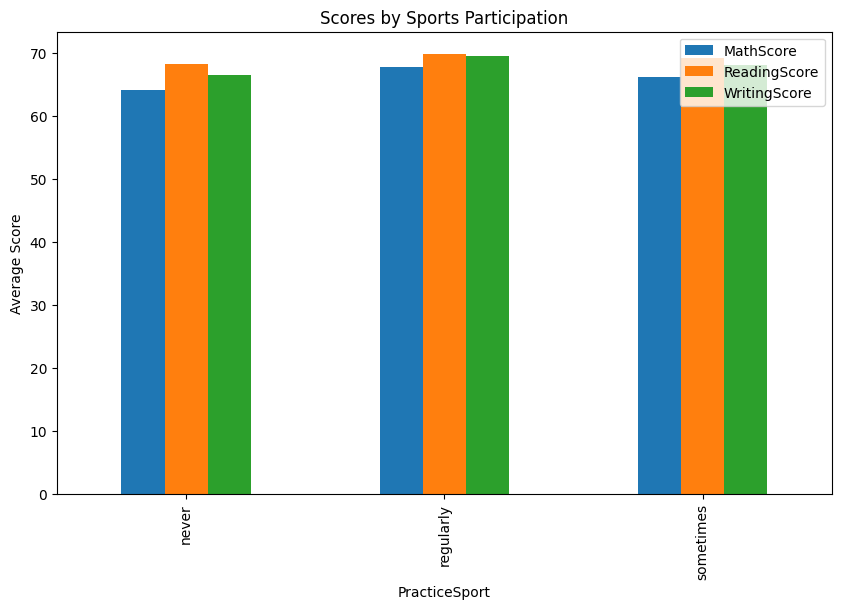

In [46]:
# Group by PracticeSport and calculate mean scores
sport_scores = df.groupby('PracticeSport')[['MathScore', 'ReadingScore', 'WritingScore']].mean()
print(sport_scores)

# Plot results
sport_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Scores by Sports Participation')
plt.ylabel('Average Score')
plt.show()


              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.246832     69.132614     68.210887
yes           66.740646     69.542553     68.558484


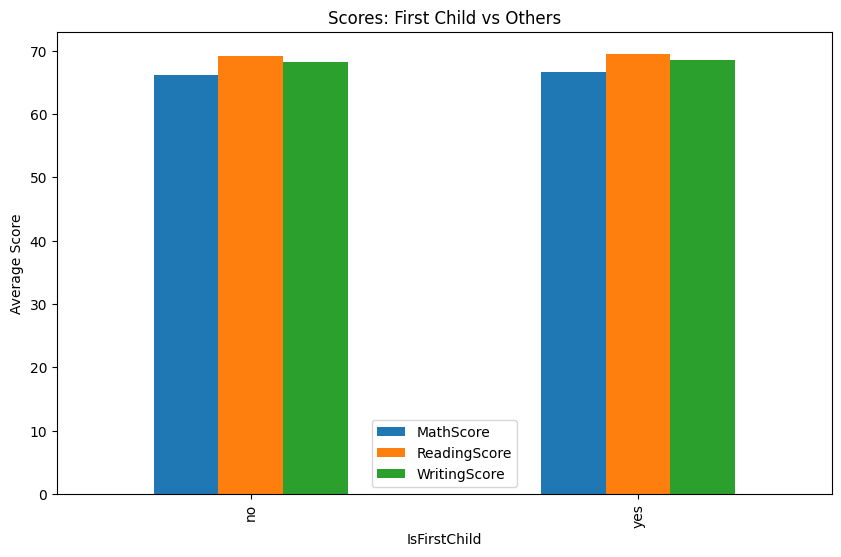

In [47]:
# Compare scores for first child vs others
first_child_scores = df.groupby('IsFirstChild')[['MathScore', 'ReadingScore', 'WritingScore']].mean()
print(first_child_scores)

# Plot results
first_child_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Scores: First Child vs Others')
plt.ylabel('Average Score')
plt.show()
